Nova IMS - Post-graduation Data Science for Finance
Algorithmic Trading Group Assignment
Group members:
- 
-
- 
- 
- 

In [1]:
#imports
import pandas as pd
import yfinance as yf
!pip install pandas_ta
import pandas_ta as ta
import plotly.graph_objects as go
from datetime import datetime, date

In [2]:
# download assets data
tesla = yf.download('TSLA', start='2014-01-01', end='2022-12-31') #Tesla
spy = yf.download('SPY', start='2014-01-01', end='2022-12-31', interval='1d') #S&P500 ETF

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#See Tesla data
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03 00:00:00-05:00,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06 00:00:00-05:00,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07 00:00:00-05:00,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08 00:00:00-05:00,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


<AxesSubplot: xlabel='Date'>

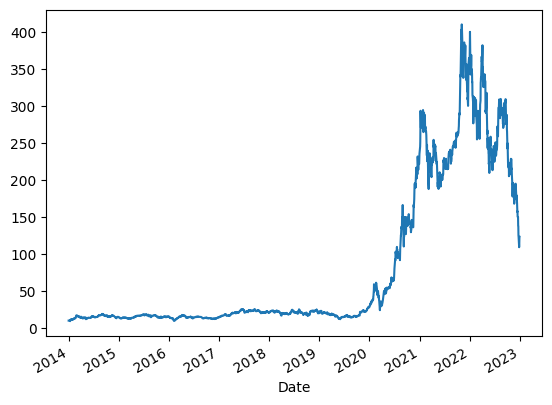

In [4]:
#Plot Tesla close price 
tesla.Close.plot()

In [5]:
#See S&P500 ETF data
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,183.979996,184.070007,182.479996,182.919998,154.400238,119636900
2014-01-03 00:00:00-05:00,183.229996,183.600006,182.630005,182.889999,154.374893,81390600
2014-01-06 00:00:00-05:00,183.490005,183.559998,182.080002,182.360001,153.927551,108028200
2014-01-07 00:00:00-05:00,183.089996,183.789993,182.949997,183.479996,154.872925,86144200
2014-01-08 00:00:00-05:00,183.449997,183.830002,182.889999,183.520004,154.906708,96582300
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,379.649994,383.059998,378.029999,382.910004,381.454193,59857300
2022-12-27 00:00:00-05:00,382.790009,383.149994,379.649994,381.399994,379.949921,51638200
2022-12-28 00:00:00-05:00,381.329987,383.390015,376.420013,376.660004,375.227936,70911500


<AxesSubplot: xlabel='Date'>

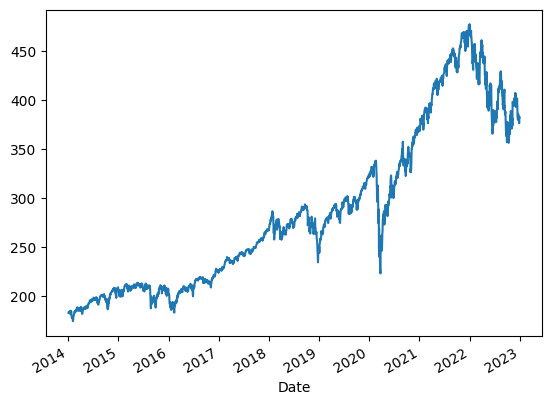

In [6]:
#Plot S&P500 ETF close price 
spy.Close.plot()

### Strategy A

Use Bollinger bands

When high is above the upper line and the close is below the upper line short sell

When low is below the lower line and the close is above the lower line go long

In [7]:
#calculate bollinger bands for S&P500 ETF and append to data set
tesla.ta.bbands(append=True)
tesla.tail(10)

,Open,High,Low,Close,Adj Close,Volume,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,,,,,,,
2022-12-16 00:00:00-05:00,159.639999,160.990005,150.039993,150.229996,150.229996,139032200,147.217112,158.694000,170.170888,14.464174,0.131259
2022-12-19 00:00:00-05:00,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,146.395970,155.103998,163.812025,11.228631,0.199473
2022-12-20 00:00:00-05:00,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,136.251334,150.473999,164.696664,18.903818,0.054444
2022-12-21 00:00:00-05:00,139.339996,141.259995,135.889999,137.570007,137.570007,145417400,130.997481,146.628000,162.258519,21.319964,0.210247
2022-12-22 00:00:00-05:00,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,121.675030,140.164000,158.652970,26.381910,0.099383
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,115.382275,134.748001,154.113727,28.743619,0.200553
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,105.324380,126.594002,147.863623,33.602890,0.088756
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,101.440750,121.576001,141.711252,33.123726,0.279839
2022-12-29 00:00:00-05:00,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,105.731933,118.425999,131.120066,21.437972,0.633685


In [8]:
#calculate bollinger bands for S&P500 ETF and append to data set
spy.ta.bbands(append=True)
spy.tail(10)

,Open,High,Low,Close,Adj Close,Volume,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,,,,,,,
2022-12-16 00:00:00-05:00,385.179993,386.579987,381.040009,383.269989,381.812805,119858000,380.520551,394.644000,408.767450,7.157565,0.097336
2022-12-19 00:00:00-05:00,383.470001,383.820007,378.279999,380.019989,378.575165,79878100,373.583955,390.857996,408.132036,8.839037,0.186292
2022-12-20 00:00:00-05:00,379.230011,382.230011,377.850006,380.540009,379.093201,74427200,372.035811,386.571997,401.108183,7.520558,0.292518
2022-12-21 00:00:00-05:00,383.250000,387.410004,382.690002,386.230011,384.761566,78167400,376.727140,383.938000,391.148861,3.756263,0.658928
2022-12-22 00:00:00-05:00,383.049988,386.209991,374.769989,380.720001,379.272491,100120900,377.502004,382.156000,386.809996,2.435653,0.345724
2022-12-23 00:00:00-05:00,379.649994,383.059998,378.029999,382.910004,381.454193,59857300,377.490422,382.084003,386.677584,2.404487,0.589908
2022-12-27 00:00:00-05:00,382.790009,383.149994,379.649994,381.399994,379.949921,51638200,378.145451,382.360004,386.574556,2.204494,0.386108
2022-12-28 00:00:00-05:00,381.329987,383.390015,376.420013,376.660004,375.227936,70911500,375.363405,381.584003,387.804600,3.260408,0.104218
2022-12-29 00:00:00-05:00,379.630005,384.350006,379.079987,383.440002,381.982178,66970900,376.236654,381.026001,385.815348,2.513921,0.752018


In [10]:
#Use backtrader to test strategy
import backtrader as bt

In [12]:
"""#inicialize backtrater
cerebro = bt.Cerebro()

#Define account paper money 10K
cerebro.broker.setcash(10000)
print(f"Initial portfoloio value: {cerebro.broker.getvalue()}")"""

Initial portfoloio value: 10000


In [17]:
# Feed data to backtrader
tesla_bt = bt.feeds.PandasData(dataname=tesla)
cerebro.adddata(tesla_bt)
spy_bt = bt.feeds.PandasData(dataname=spy)
cerebro.adddata(spy_bt)

In [28]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

In [31]:
"""
adaptar este codigo com a nossa estrategia das BBands
"""

class BuyAndHold_1(bt.Strategy):
    def start(self):
        self.val_start = self.broker.get_cash()  # keep the starting cash

    def nextstart(self):
        # Buy all the available cash
        size = int(self.broker.get_cash() / self.data)
        self.buy(size=size)

    def stop(self):
        # calculate the actual returns
        self.roi = (self.broker.get_value() / self.val_start) - 1.0
        print('ROI:        {:.2f}%'.format(100.0 * self.roi))

cerebro = bt.Cerebro()
cerebro.broker.setcash(100_000.0)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue(): ,.2f}')

cerebro.adddata(spy_bt)
cerebro.addstrategy(BuyAndHold_1)
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')
cerebro.plot(iplot=False)

Starting Portfolio Value:  100,000.00
ROI:        0.00%
Final Portfolio Value: 100,000.00


[[<Figure size 1792x1344 with 4 Axes>]]

Starting Portfolio Value: 10,000.00
Final Portfolio Value: 10,189.01
Sharpe Ratio:  -0.9731008324849819
Returns:  0.018724940850841202


<IPython.core.display.Javascript object>


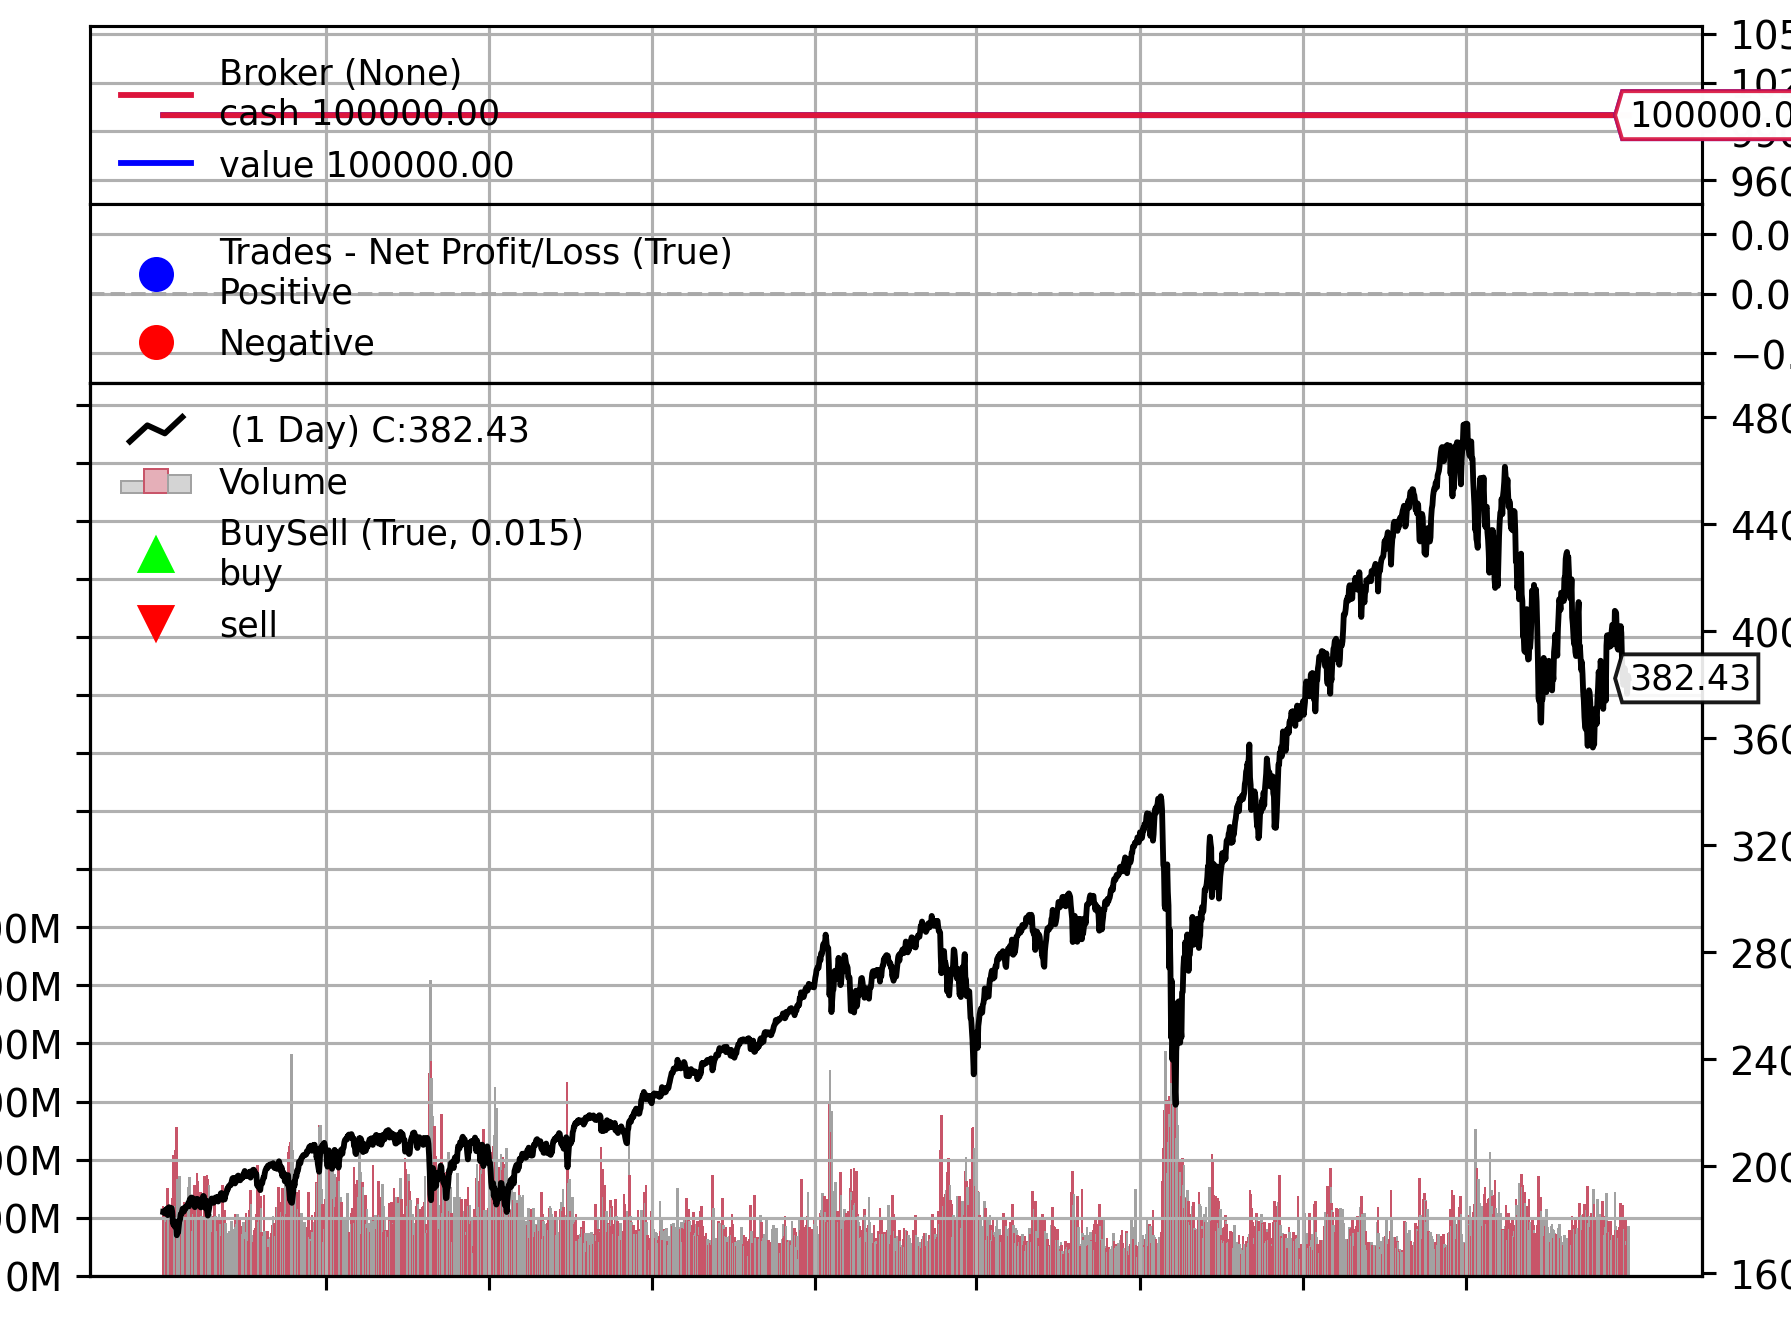

[[<Figure size 640x480 with 5 Axes>]]

In [29]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(10000)

cerebro.adddata(tesla_bt)

cerebro.addstrategy(bt.strategies.MA_CrossOver, fast=50, slow=200)
cerebro.broker.setcommission(commission=0.0004)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, annualize=True)
cerebro.addanalyzer(bt.analyzers.Returns)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():,.2f}')
results = cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():,.2f}')

print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
print('Returns: ', results[0].analyzers.returns.get_analysis().get('rtot'))
cerebro.plot(iplot=True)